In [333]:
import sys
import os
import cv2
import numpy as np
from IPython.display import Image as img_display

In [334]:
print('\ndetect_er_chars.py')
print('       A simple demo script using the Extremal Region Filter algorithm described in:')
print('       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012\n')


detect_er_chars.py
       A simple demo script using the Extremal Region Filter algorithm described in:
       Neumann L., Matas J.: Real-Time Scene Text Localization and Recognition, CVPR 2012



In [335]:
pathname='/notebooks/resources' #os.path.dirname(sys.argv[0])
file=pathname+'/'+'hw_pzlines.png'
# display in IPython
# img_display(filename=file)

In [336]:
img = cv2.imread(file)#(str(sys.argv[1]))
gray= cv2.imread(file,0)#(str(sys.argv[1]),0)

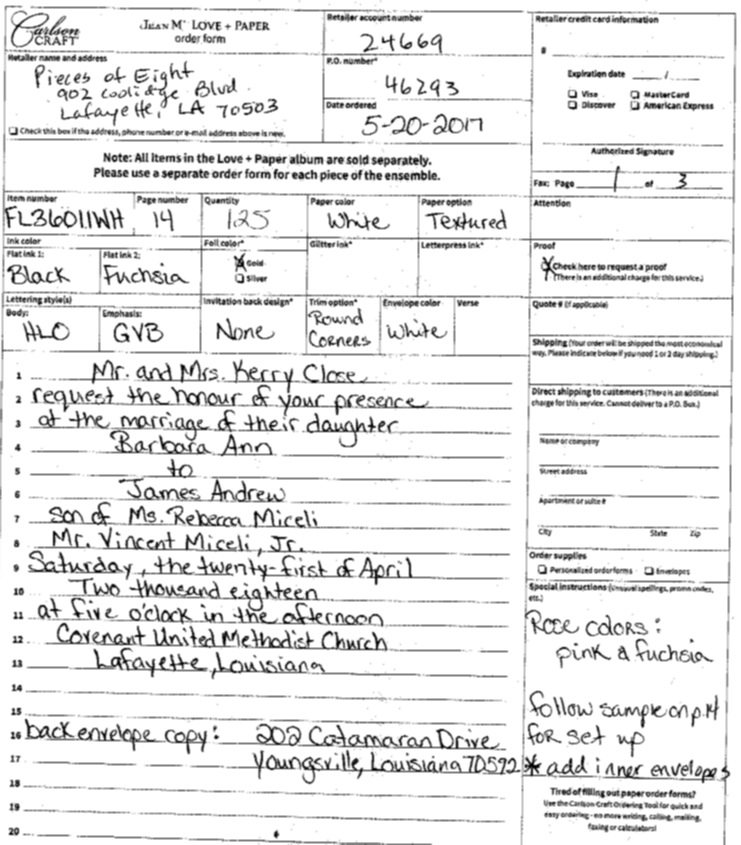

In [337]:
# apply blur
gray=cv2.GaussianBlur(gray, (3,3), 0)
cv2.imwrite(pathname+"/blur.png",gray)
img_display(filename=pathname+"/blur.png")

In [338]:
# bightness
# value=255
# gray = np.where((255 - gray) > 0,0,255)
# for x in range(0, len(gray)):
#     for y in range(0, len(gray[x])):
#         if gray[x,y]<255:
#             gray[x, y]=0
# cv2.imwrite(pathname+"/brightness.png",gray)
# img_display(filename=pathname+"/brightness.png")

In [339]:
# invert color
# gray=cv2.bitwise_not(gray)
# cv2.imwrite(pathname+"/bitwise.png",gray)
# img_display(filename=pathname+"/bitwise.png")

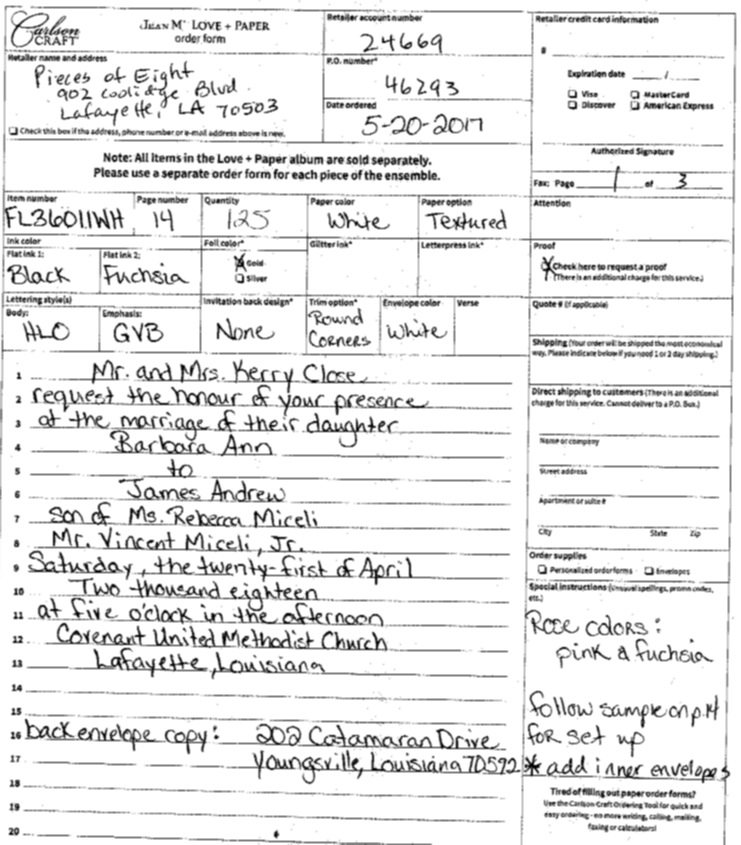

In [340]:
# Apply dilation and erosion to remove some noise
kernel =np.ones((1,1),np.uint8)
gray=cv2.dilate(gray,kernel,iterations=1)
gray=cv2.erode(gray,kernel,iterations=1)
cv2.imwrite(pathname+"/removed_noise.png",gray)
img_display(filename=pathname+"/removed_noise.png")

In [341]:
# Apply threshold to get image with only black and white
# gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,1)
# cv2.imwrite(pathname+"/thres.png",gray)
# img_display(filename=pathname+"/thres.png")

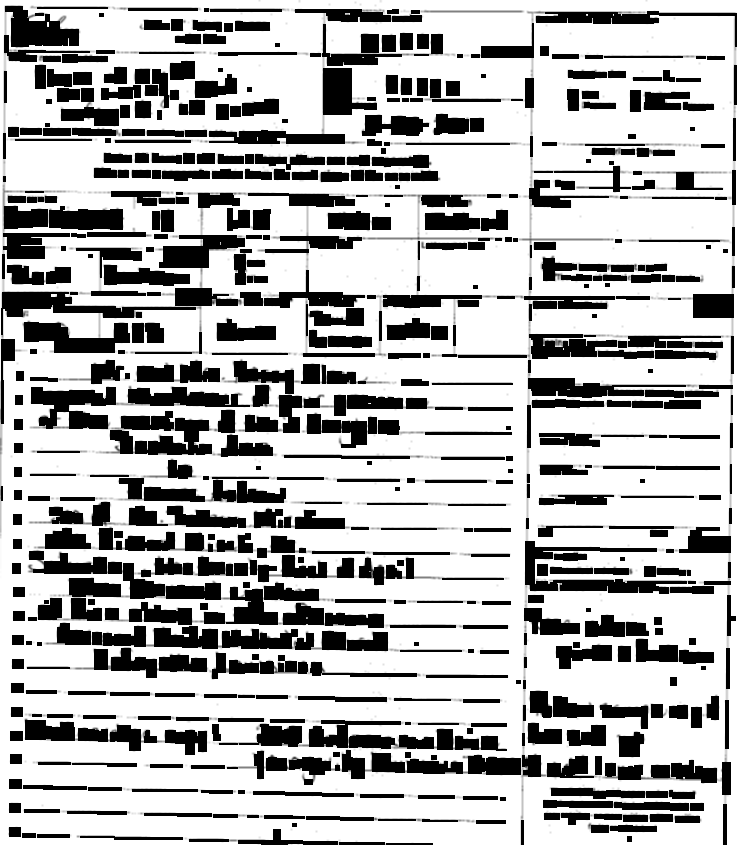

In [342]:
# MSER to detect regions
# mser = cv2.MSER_create(1,25,200)
mser = cv2.MSER_create(2,10,80,1)
regions,_ = mser.detectRegions(gray)
# draw hull lines
# hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
# cv2.polylines(img, hulls, 1, (0, 255, 0))

# draw rectangles
rects=[cv2.boundingRect(p.reshape(-1,1,2)) for p in regions]
for rect in rects:
    cv2.rectangle(gray,rect[0:2],(rect[0]+rect[2],rect[1]+rect[3]),(0,0,0),-1)
    
cv2.imwrite(pathname+"/filled.png",gray)
img_display(filename=pathname+"/filled.png")

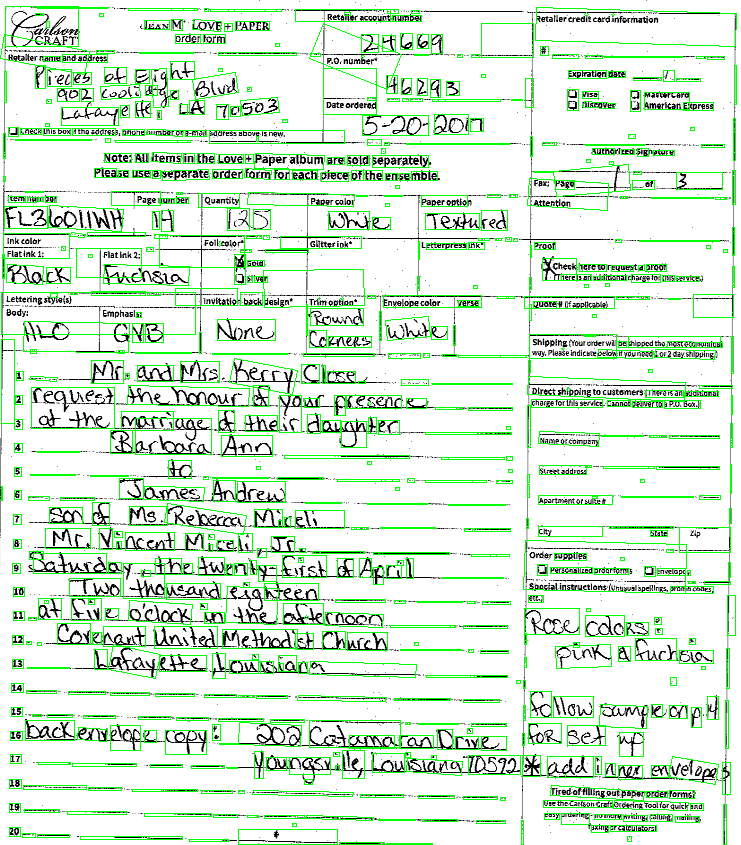

In [343]:
# detect black blocks
bgr=cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
gray=cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
# colours=['yellow','orange','red','green','black','white']
# lowers=[[30,255,255],[15,255,255],[6,255,255],[0,0,0],[0, 0, 205]]
# uppers=[[20,100,100],[5,100,100],[0,100,100],[180, 10, 50],[180, 10, 255]]

lower=np.array([0, 0, 0],np.uint8)
upper=np.array([180, 10, 50],np.uint8)
separated=cv2.inRange(gray,lower,upper)

#this bit draws a red rectangle around the detected region 
im2,contours,hierarchy=cv2.findContours(separated,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE) 
max_area = 0 
largest_contour = None 

for idx, contour in enumerate(contours): 
    area = cv2.contourArea(contour) 
    # if area > max_area: 
    max_area = area 
    largest_contour=contour 
    if largest_contour is not None:
        moment = cv2.moments(largest_contour) 
        # if moment["m00"] > 0: 
        rect = cv2.minAreaRect(largest_contour) 
        rect = ((rect[0][0], rect[0][1]), (rect[1][0], rect[1][1]), rect[2]) 
        (width,height)=(rect[1][0],rect[1][1]) 
        #print(str(width)+" "+str(height)) 
        box = cv2.boxPoints(rect) 
        box = np.int0(box) 
        #if(height>0.9*width and height<1.1*width): 
        cv2.drawContours(img,[box], 0, (0, 255, 0), 1)
                    
cv2.imwrite(pathname+"/result.png",img)
img_display(filename=pathname+"/result.png")